In [1]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd

from geoglue.memoryraster import MemoryRaster
from geoglue.era5 import ERA5

era5_file = "../79a080c8aaa9b3f1d4808e650202035c.nc"
population_highres = MemoryRaster.read("../data/vnm_ppp_2020_UNadj_constrained.tif", crs="EPSG:4326")

In [2]:
era5 = ERA5(era5_file, "VNM", admin_level=2, statistic="daily_mean")
era5

<ERA5 iso3=VNM admin_level=2 statistic=daily_mean filename='../79a080c8aaa9b3f1d4808e650202035c.nc'>

In [3]:
era5.set_population(population_highres)

Resampling using: 13


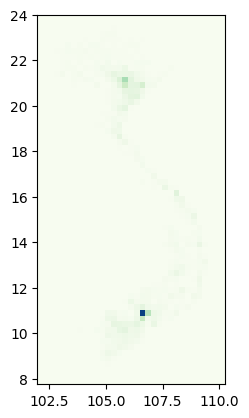

<Axes: >

In [4]:
era5.population.plot()

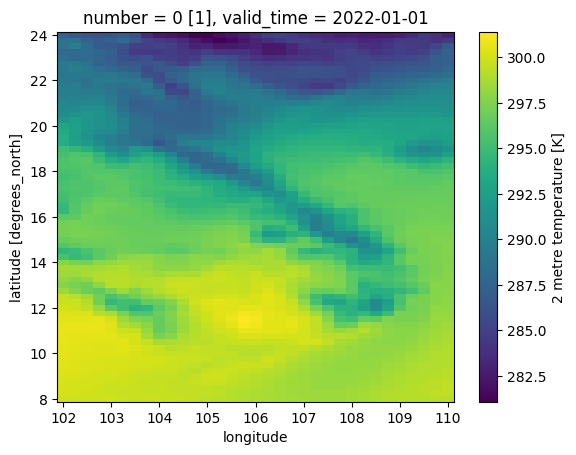

In [5]:
era5.get_variable("2m_temperature").isel(valid_time=0).plot()

In [6]:
weighted_temp = era5.zonal_daily("2m_temperature")

/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:341: RuntimeWarning: Spatial reference system of input features does not exactly match weighting raster.
  warnings.warn(
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/src/geoglue/era5.py:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out, df])
/Users/abhidg/ghq/github.com/kraemer-lab/geoglue/.venv/lib/python3.13/site-packages/exactextract/exact_extract.py:330: RuntimeWarning: Spatia

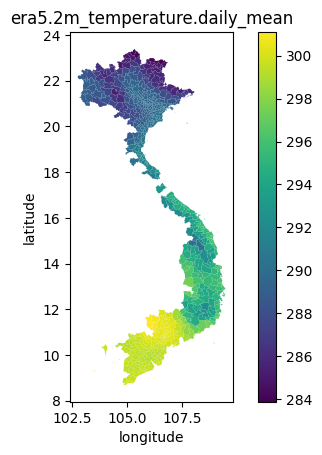

In [7]:
weighted_temp.plot("2022-01-01")

In [10]:
weighted_temp.data.shape

(259150, 8)

In [12]:
weighted_temp.data.to_parquet("VNM-era5.2m_temperature.daily_mean.parquet", index=False)


In [ ]:
!pi